In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier

/Users/samarthgoenka/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_1 = pd.read_csv('training data.csv')
df_2 = pd.read_csv('training data_50_100.csv')
df_3 = pd.read_csv('training data_100_150.csv')
df_4 = pd.read_csv('training data_150_200.csv')

comp_data = ((df_1.append(df_2)).append(df_3)).append(df_4)


print(comp_data.head())

   dow_1  dow_2  dow_3  dow_4  dow_5  dow_6  dow_7  month_1  month_2  month_3  \
0      1      0      0      0      0      0      0        1        0        0   
1      1      0      0      0      0      0      0        1        0        0   
2      1      0      0      0      0      0      0        1        0        0   
3      1      0      0      0      0      0      0        1        0        0   
4      1      0      0      0      0      0      0        1        0        0   

     ...      ct_610.0  ct_611.0  ct_612.0  ct_614.0  ct_615.0  ct_9802.0  \
0    ...             0         0         0         0         0          0   
1    ...             0         0         0         0         0          0   
2    ...             0         0         0         0         0          0   
3    ...             0         0         0         0         0          0   
4    ...             0         0         0         0         0          0   

   ct_9803.0  ct_9805.01  ct_9806.0  ct_9809.0  
0

In [3]:
y_any_1h=np.array(comp_data['future_any_1_hour'])
y_any_1h_train = y_any_1h[0:154000]
y_any_1h_test = y_any_1h[154000:]

y_prop_1h=np.array(comp_data['future_property_1_hour'])
y_prop_1h_train = y_prop_1h[0:154000]
y_prop_1h_test = y_prop_1h[154000:]
               
y_viol_1h=np.array(comp_data['future_violent_1_hour'])
y_viol_1h_train = y_prop_1h[0:154000]
y_viol_1h_test = y_prop_1h[154000:]

y_robb_1h=np.array(comp_data['future_robbery_1_hour'])
y_robb_1h_train = y_prop_1h[0:154000]
y_robb_1h_test = y_prop_1h[154000:]

y_oth_1h=np.array(comp_data['future_other_1_hour'])
y_oth_1h_train = y_prop_1h[0:154000]
y_oth_1h_test = y_prop_1h[154000:]

comp_data.drop(['future_property_1_hour', 'future_violent_1_hour', \
                 'future_robbery_1_hour', 'future_other_1_hour','future_any_1_hour'], axis=1, inplace=True)
X = comp_data.as_matrix()
X_train = X[0:154000, :]
X_test = X[154000:, :]

In [4]:
start = time.time()

tc_any1=DecisionTreeClassifier()
tc_any1.fit(X_train,y_any_1h_train)

end = time.time()
print(end-start)
start = time.time()

rf_any1 = RandomForestClassifier()
rf_any1.fit(X_train,y_any_1h_train)

end = time.time()
print(end-start)

start = time.time()

gb_any1 = GradientBoostingClassifier()
gb_any1.fit(X_train,y_any_1h_train)

end = time.time()
print(end-start)
start = time.time()

bag_any1 = BaggingClassifier(base_estimator=rf_any1)
bag_any1.fit(X_train,y_any_1h_train)

end = time.time()
print(end-start)

start = time.time()

lg_any1 = LogisticRegression()
lg_any1.fit(X_train,y_any_1h_train)

end=time.time()
print(end-start)

14.466041088104248
6.428171873092651
136.7982099056244
46.18502902984619
19.158873081207275


In [5]:
start = time.time()

tc_prop1=DecisionTreeClassifier()
tc_prop1.fit(X_train,y_prop_1h_train)

end = time.time()
print(end-start)
start = time.time()

rf_prop1 = RandomForestClassifier()
rf_prop1.fit(X_train,y_prop_1h_train)

end = time.time()
print(end-start)

start = time.time()

gb_prop1 = GradientBoostingClassifier()
gb_prop1.fit(X_train,y_prop_1h_train)

end = time.time()
print(end-start)
start = time.time()

bag_prop1 = BaggingClassifier(base_estimator=rf_prop1)
bag_prop1.fit(X_train,y_prop_1h_train)

end = time.time()
print(end-start)

start = time.time()

lg_prop1 = LogisticRegression()
lg_prop1.fit(X_train,y_prop_1h_train)

end=time.time()
print(end-start)

15.43133020401001
5.789446115493774
122.3603458404541
41.390533208847046
10.387509107589722


In [6]:
start = time.time()

tc_viol1=DecisionTreeClassifier()
tc_viol1.fit(X_train,y_viol_1h_train)

end = time.time()
print(end-start)
start = time.time()

rf_viol1 = RandomForestClassifier()
rf_viol1.fit(X_train,y_viol_1h_train)

end = time.time()
print(end-start)
start = time.time()

gb_viol1 = GradientBoostingClassifier()
gb_viol1.fit(X_train,y_viol_1h_train)

end = time.time()
print(end-start)
start = time.time()

bag_viol1 = BaggingClassifier(base_estimator=rf_viol1)
bag_viol1.fit(X_train,y_viol_1h_train)

end = time.time()
print(end-start)

start = time.time()

lg_viol1 = LogisticRegression()
lg_viol1.fit(X_train,y_viol_1h_train)

end=time.time()
print(end-start)

15.370255947113037
5.926964044570923
123.07158493995667
41.18763589859009
10.44201397895813


In [7]:
start = time.time()

tc_robb1=DecisionTreeClassifier()
tc_robb1.fit(X_train,y_robb_1h_train)

end = time.time()
print(end-start)
start = time.time()

rf_robb1 = RandomForestClassifier()
rf_robb1.fit(X_train,y_robb_1h_train)

end = time.time()
print(end-start)
start = time.time()

gb_robb1 = GradientBoostingClassifier()
gb_robb1.fit(X_train,y_robb_1h_train)

end = time.time()
print(end-start)
start = time.time()

bag_robb1 = BaggingClassifier(base_estimator=rf_robb1)
bag_robb1.fit(X_train,y_robb_1h_train)

end = time.time()
print(end-start)
start = time.time()

lg_robb1 = LogisticRegression()
lg_robb1.fit(X_train,y_robb_1h_train)

end=time.time()
print(end-start)


15.286671876907349
5.6832358837127686
123.02561688423157
41.29912281036377
10.861398935317993


In [8]:
start = time.time()

tc_oth1=DecisionTreeClassifier()
tc_oth1.fit(X_train,y_oth_1h_train)

end = time.time()
print(end-start)
start = time.time()

rf_oth1 = RandomForestClassifier()
rf_oth1.fit(X_train,y_oth_1h_train)

end = time.time()
print(end-start)
start = time.time()

bag_oth1 = BaggingClassifier(base_estimator=rf_oth1)
bag_oth1.fit(X_train,y_oth_1h_train)

end = time.time()
print(end-start)
start = time.time()

gb_oth1 = GradientBoostingClassifier()
gb_oth1.fit(X_train,y_oth_1h_train)

end = time.time()
print(end-start)

start = time.time()

lg_oth1 = LogisticRegression()
lg_oth1.fit(X_train,y_oth_1h_train)

end=time.time()
print(end-start)

15.43192982673645
6.041348934173584
41.89544916152954
122.6946792602539
10.307461261749268


In [9]:
tc_a1_pred = tc_any1.predict(X_test)
tc_a1_probs = tc_any1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(tc_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, tc_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

rf_a1_pred = rf_any1.predict(X_test)
rf_a1_probs = rf_any1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rf_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, rf_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

gb_a1_pred = gb_any1.predict(X_test)
gb_a1_probs = gb_any1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, gb_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

bag_a1_pred = bag_any1.predict(X_test)
bag_a1_probs = bag_any1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, bag_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

lg_a1_pred = lg_any1.predict(X_test)
lg_a1_probs = lg_any1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lg_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, lg_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.769478280855
0.568801213297
0.84233509538
0.703741669292
0.848438417733
0.76608976894
0.847187108966
0.755132252309
0.848974692919
0.767645417489


In [10]:
tc_p1_pred = tc_prop1.predict(X_test)
tc_p1_probs = tc_prop1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(tc_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, tc_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

rf_p1_pred = rf_prop1.predict(X_test)
rf_p1_probs = rf_prop1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rf_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, rf_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

gb_p1_pred = gb_prop1.predict(X_test)
gb_p1_probs = gb_prop1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, gb_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

bag_p1_pred = bag_prop1.predict(X_test)
bag_p1_probs = bag_prop1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, bag_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

lg_p1_pred = lg_prop1.predict(X_test)
lg_p1_probs = lg_prop1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lg_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, lg_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.885313720984
0.533046245625
0.936183252892
0.660337247106
0.937945299931
0.75343180342
0.937894226104
0.734313294784
0.937945299931
0.75532382828


In [11]:
tc_v1_pred = tc_viol1.predict(X_test)
tc_v1_probs = tc_viol1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(tc_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, tc_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

rf_v1_pred = rf_viol1.predict(X_test)
rf_v1_probs = rf_viol1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rf_p1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, rf_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

gb_v1_pred = gb_viol1.predict(X_test)
gb_v1_probs = gb_viol1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, gb_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

bag_v1_pred = bag_viol1.predict(X_test)
bag_v1_probs = bag_viol1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, bag_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

lg_v1_pred = lg_viol1.predict(X_test)
lg_v1_probs = lg_viol1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lg_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, lg_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.887535432468
0.530579782047
0.936183252892
0.664368816558
0.937945299931
0.753408308009
0.937894226104
0.731575042966
0.937945299931
0.75532382828


In [12]:
tc_r1_pred = tc_robb1.predict(X_test)
tc_r1_probs = tc_robb1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(tc_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, tc_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

rf_r1_pred = rf_robb1.predict(X_test)
rf_r1_probs = rf_robb1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rf_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, rf_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

gb_r1_pred = gb_robb1.predict(X_test)
gb_r1_probs = gb_robb1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, gb_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

bag_r1_pred = bag_robb1.predict(X_test)
bag_r1_probs = bag_robb1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, bag_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

lg_r1_pred = lg_robb1.predict(X_test)
lg_r1_probs = lg_robb1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lg_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, lg_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.887816338517
0.532843156533
0.936770601905
0.675870940837
0.937945299931
0.75343889574
0.937945299931
0.736988264731
0.937945299931
0.75532382828


In [13]:
tc_o1_pred = tc_oth1.predict(X_test)
tc_o1_probs = tc_oth1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(tc_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, tc_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

rf_o1_pred = rf_oth1.predict(X_test)
rf_o1_probs = rf_oth1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rf_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, rf_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

gb_o1_pred = gb_oth1.predict(X_test)
gb_o1_probs = gb_oth1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, gb_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

bag_o1_pred = bag_oth1.predict(X_test)
bag_o1_probs = bag_oth1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, bag_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

lg_o1_pred = lg_oth1.predict(X_test)
lg_o1_probs = lg_oth1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lg_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, lg_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.883653821599
0.530239905292
0.936821675732
0.658993101178
0.937945299931
0.753421641123
0.937843152277
0.738286192933
0.937945299931
0.75532382828


In [14]:
start = time.time()

params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid_a1 = RandomizedSearchCV(estimator=rf_any1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
rfgrid_a1.fit(X_train,y_any_1h_train)

end = time.time()
print(end-start)

start=time.time()

params = {'C':[0.01,0.1,1,10]}

loggrid_a1 = RandomizedSearchCV(estimator=lg_any1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
loggrid_a1.fit(X_train,y_any_1h_train)

end=time.time()
print(end-start)

78.90402507781982
201.29838585853577


In [15]:
start = time.time()

params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid_p1 = RandomizedSearchCV(estimator=rf_prop1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
rfgrid_p1.fit(X_train,y_prop_1h_train)

end = time.time()
print(end-start)

start=time.time()

params = {'C':[0.01,0.1,1,10]}

loggrid_p1 = RandomizedSearchCV(estimator=lg_prop1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
loggrid_p1.fit(X_train,y_prop_1h_train)

end=time.time()
print(end-start)

75.6060881614685
155.34541010856628


In [16]:
start = time.time()

params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid_v1 = RandomizedSearchCV(estimator=rf_viol1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
rfgrid_v1.fit(X_train,y_viol_1h_train)

end = time.time()
print(end-start)

start=time.time()

params = {'C':[0.01,0.1,1,10]}

loggrid_v1 = RandomizedSearchCV(estimator=lg_viol1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
loggrid_v1.fit(X_train,y_viol_1h_train)

end=time.time()
print(end-start)

76.09194493293762
118.44780397415161


In [17]:
start = time.time()

params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid_r1 = RandomizedSearchCV(estimator=rf_robb1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
rfgrid_r1.fit(X_train,y_robb_1h_train)

end = time.time()
print(end-start)

start=time.time()

params = {'C':[0.01,0.1,1,10]}

loggrid_r1 = RandomizedSearchCV(estimator=lg_prop1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
loggrid_r1.fit(X_train,y_robb_1h_train)

end=time.time()
print(end-start)

97.51180696487427
154.26187205314636


In [18]:
params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid_o1 = RandomizedSearchCV(estimator=rf_oth1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
rfgrid_o1.fit(X_train,y_oth_1h_train)

end = time.time()
print(end-start)

start=time.time()

params = {'C':[0.01,0.1,1,10]}

loggrid_o1 = RandomizedSearchCV(estimator=lg_oth1,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
loggrid_o1.fit(X_train,y_oth_1h_train)

end=time.time()
print(end-start)

223.62204313278198
165.36268591880798


0.84785106872
0.76021862495


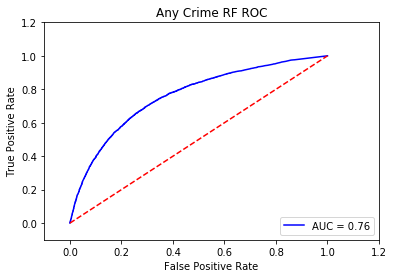

0.849383283536
0.768096590663


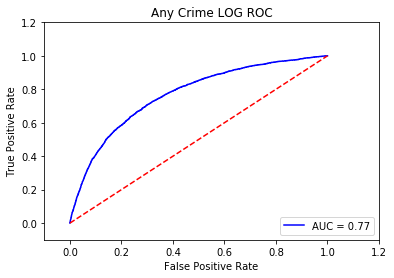

0.848438417733
0.76608976894


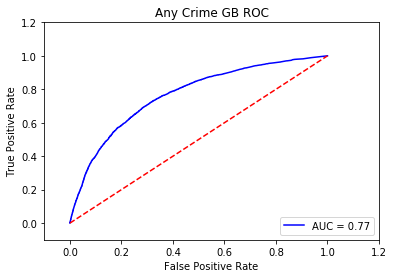

0.847187108966
0.755132252309


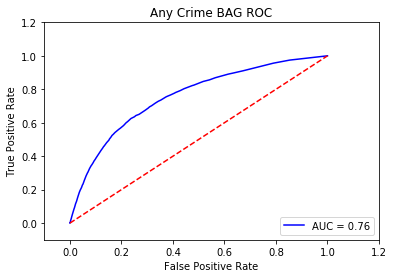

In [19]:
rfgrid_a1_pred = rfgrid_a1.predict(X_test)
rfgrid_a1_probs = rfgrid_a1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rfgrid_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, rfgrid_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Any Crime RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

lggrid_a1_pred = loggrid_a1.predict(X_test)
lggrid_a1_probs = loggrid_a1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lggrid_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, lggrid_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Any Crime LOG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

gb_a1_pred = gb_any1.predict(X_test)
gb_a1_probs = gb_any1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, gb_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Any Crime GB ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

bag_a1_pred = bag_any1.predict(X_test)
bag_a1_probs = bag_any1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, bag_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Any Crime BAG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.937945299931
0.748153739092


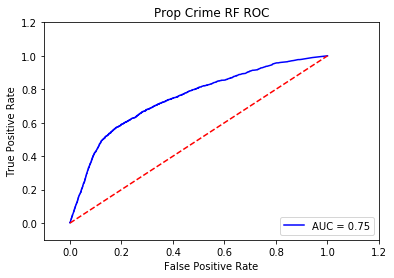

0.937945299931
0.75532382828


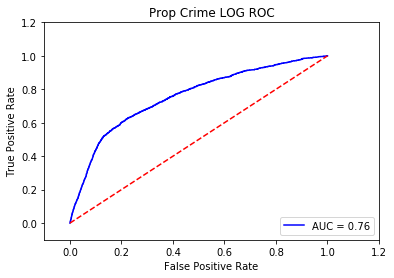

0.937945299931
0.75343180342


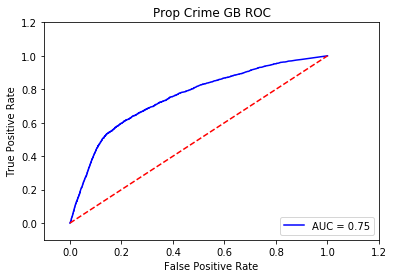

0.937894226104
0.734313294784


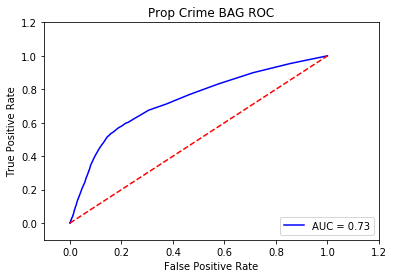

In [20]:
rfgrid_p1_pred = rfgrid_p1.predict(X_test)
rfgrid_p1_probs = rfgrid_p1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rfgrid_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, rfgrid_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Prop Crime RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

lggrid_p1_pred = loggrid_p1.predict(X_test)
lggrid_p1_probs = loggrid_p1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lggrid_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, lggrid_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Prop Crime LOG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

gb_p1_pred = gb_prop1.predict(X_test)
gb_p1_probs = gb_prop1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, gb_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Prop Crime GB ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

bag_p1_pred = bag_prop1.predict(X_test)
bag_p1_probs = bag_prop1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, bag_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Prop Crime BAG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.937945299931
0.748172388645


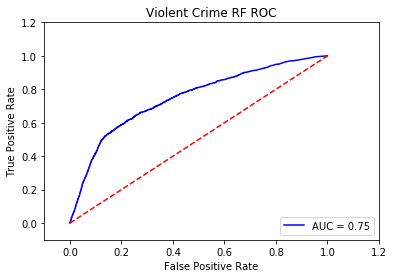

0.937945299931
0.754708880425


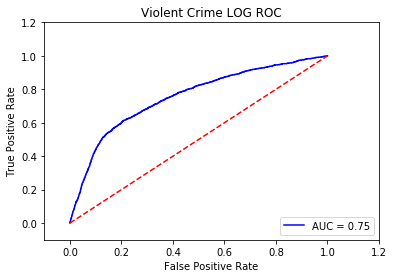

0.937945299931
0.753408308009


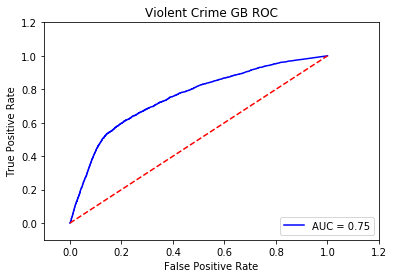

0.937894226104
0.731575042966


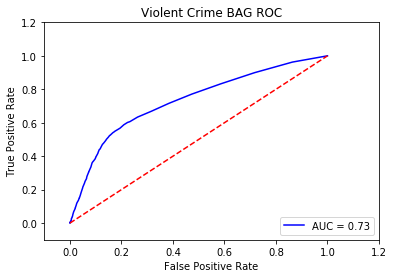

In [21]:
rfgrid_v1_pred = rfgrid_v1.predict(X_test)
rfgrid_v1_probs = rfgrid_v1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rfgrid_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, rfgrid_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Violent Crime RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

lggrid_v1_pred = loggrid_v1.predict(X_test)
lggrid_v1_probs = loggrid_v1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lggrid_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, lggrid_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Violent Crime LOG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

gb_v1_pred = gb_viol1.predict(X_test)
gb_v1_probs = gb_viol1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, gb_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Violent Crime GB ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

bag_v1_pred = bag_viol1.predict(X_test)
bag_v1_probs = bag_viol1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, bag_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Violent Crime BAG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.937919763017
0.732138310999


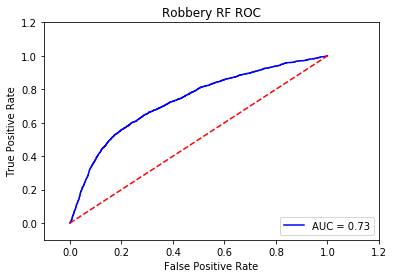

0.937945299931
0.75532382828


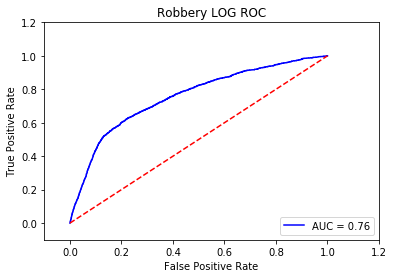

0.937945299931
0.75343889574


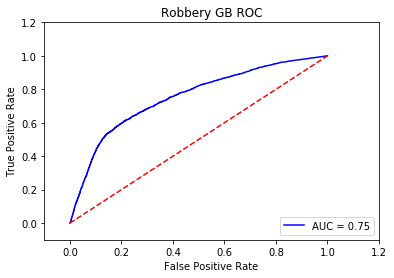

0.937945299931
0.736988264731


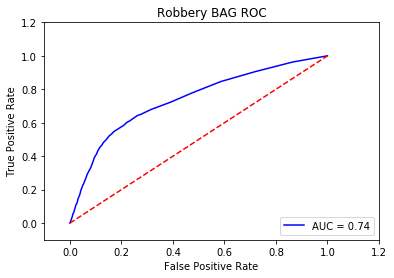

In [22]:
rfgrid_r1_pred = rfgrid_r1.predict(X_test)
rfgrid_r1_probs = rfgrid_r1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rfgrid_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, rfgrid_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Robbery RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

lggrid_r1_pred = loggrid_r1.predict(X_test)
lggrid_r1_probs = loggrid_r1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lggrid_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, lggrid_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Robbery LOG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

gb_r1_pred = gb_robb1.predict(X_test)
gb_r1_probs = gb_robb1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, gb_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Robbery GB ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

bag_r1_pred = bag_robb1.predict(X_test)
bag_r1_probs = bag_robb1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, bag_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Robbery BAG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.937945299931
0.747199766009


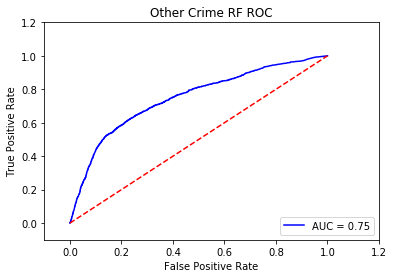

0.937945299931
0.754708880425


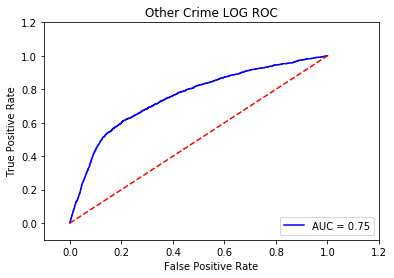

0.937945299931
0.753421641123


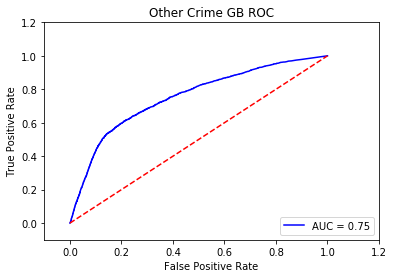

0.937843152277
0.738286192933


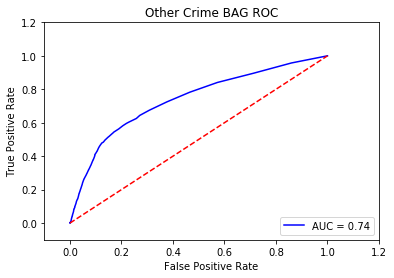

In [23]:
rfgrid_o1_pred = rfgrid_o1.predict(X_test)
rfgrid_o1_probs = rfgrid_o1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(rfgrid_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, rfgrid_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Other Crime RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

lggrid_o1_pred = loggrid_o1.predict(X_test)
lggrid_o1_probs = loggrid_o1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(lggrid_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, lggrid_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Other Crime LOG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

gb_o1_pred = gb_oth1.predict(X_test)
gb_o1_probs = gb_oth1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(gb_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, gb_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Other Crime GB ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

bag_o1_pred = bag_oth1.predict(X_test)
bag_o1_probs = bag_oth1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(bag_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, bag_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.title('Other Crime BAG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
vclf_a1 = VotingClassifier(estimators=[('LOG',loggrid_a1.best_estimator_),('RF',rfgrid_a1.best_estimator_),('GB',gb_any1),('BAG',bag_any1)],voting='soft')

params={
  'LOG__penalty':['l1','l2'],
  'RF__max_depth': [4, 8], 'RF__min_samples_leaf':[3, 4],
  'GB__learning_rate':[0.01,0.03,0.1],'GB__max_features':['auto','sqrt','log2'],
  'voting':['soft']}

allgrid_a1 = RandomizedSearchCV(estimator=vclf_a1,param_distributions=params, cv=5, 
                             scoring = 'accuracy',
                             n_iter = 2)

allgrid_a1.fit(X_train,y_any_1h_train)

allgrid_a1_pred = allgrid_a1.predict(X_test)
allgrid_a1_probs = allgrid_a1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(allgrid_a1_pred, y_any_1h_test)
print(equality_grid.astype(int).mean())

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_any_1h_test, allgrid_a1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.847902142547
0.76729873639


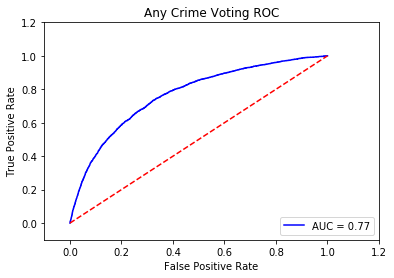

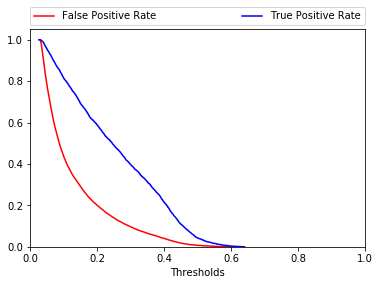


The optimal threshold for your data is: 0.14.



In [25]:
plt.title('Any Crime Voting ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure()
plt.plot(thresholds, false_positive_rate, color='red', label='False Positive Rate')
plt.plot(thresholds, true_positive_rate, color='blue', label='True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Thresholds')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

any_value = (0, 0)
for i in range(len(thresholds)):
    if thresholds[i] > 1:
        continue
    new_value = (true_positive_rate[i]-false_positive_rate[i], thresholds[i])
    if new_value[0] > any_value[0] and new_value[0] != 1.0:
        any_value = new_value
print("\nThe optimal threshold for your data is: {:.2}.\n".format(any_value[1]))

In [26]:
any_pred=(allgrid_a1_probs>=any_value[1]).astype(int)
print(any_pred)

any_pred=pd.Series(any_pred)
any_pred_acc = (y_any_1h_test==any_pred).astype(int)

print(any_pred_acc.mean())

[0 1 1 ..., 0 0 1]
0.6850277075512654


In [27]:
vclf_p1 = VotingClassifier(estimators=[('LOG',loggrid_p1.best_estimator_),('RF',rfgrid_p1.best_estimator_),('GB',gb_prop1),('BAG',bag_prop1)],voting='soft')

params={
  'LOG__penalty':['l1','l2'],
  'RF__max_depth': [4, 8], 'RF__min_samples_leaf':[3, 4],
  'GB__learning_rate':[0.01,0.03,0.1],'GB__max_features':['auto','sqrt','log2'],
  'voting':['soft']}

allgrid_p1 = RandomizedSearchCV(estimator=vclf_p1,param_distributions=params, cv=5, 
                             scoring = 'accuracy',
                             n_iter = 2)

allgrid_p1.fit(X_train,y_prop_1h_train)

allgrid_p1_pred = allgrid_p1.predict(X_test)
allgrid_p1_probs = allgrid_p1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(allgrid_p1_pred, y_prop_1h_test)
print(equality_grid.astype(int).mean())

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_prop_1h_test, allgrid_p1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.937945299931
0.755136324365


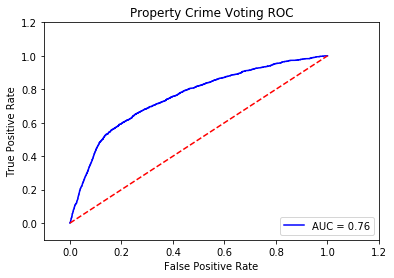

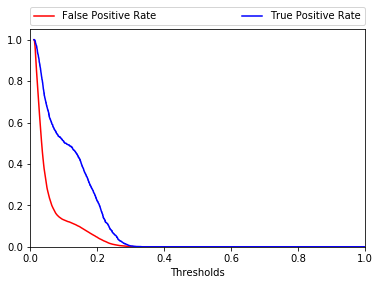


The optimal threshold for your data is: 0.067.



In [28]:
plt.title('Property Crime Voting ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure()
plt.plot(thresholds, false_positive_rate, color='red', label='False Positive Rate')
plt.plot(thresholds, true_positive_rate, color='blue', label='True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Thresholds')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

prop_value = (0, 0)
for i in range(len(thresholds)):
    if thresholds[i] > 1:
        continue
    new_value = (true_positive_rate[i]-false_positive_rate[i], thresholds[i])
    if new_value[0] > prop_value[0] and new_value[0] != 1.0:
        prop_value = new_value
print("\nThe optimal threshold for your data is: {:.2}.\n".format(prop_value[1]))

In [29]:
prop_pred=(allgrid_p1_probs>=prop_value[1]).astype(int)
print(prop_pred)

prop_pred=pd.Series(prop_pred)
prop_pred_acc = (y_prop_1h_test==prop_pred).astype(int)

print(prop_pred_acc.mean())

[0 1 0 ..., 0 0 0]
0.7947853622411195


In [30]:
vclf_v1 = VotingClassifier(estimators=[('LOG',loggrid_v1.best_estimator_),('RF',rfgrid_v1.best_estimator_)],voting='soft')

params={
  'LOG__penalty':['l1','l2'],
  'RF__max_depth': [4, 8], 'RF__min_samples_leaf':[3, 4],
  'voting':['soft']}

allgrid_v1 = RandomizedSearchCV(estimator=vclf_v1,param_distributions=params, cv=5, 
                             scoring = 'accuracy',
                             n_iter = 2)

allgrid_v1.fit(X_train,y_viol_1h_train)

allgrid_v1_pred = allgrid_v1.predict(X_test)
allgrid_v1_probs = allgrid_v1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(allgrid_v1_pred, y_viol_1h_test)
print(equality_grid.astype(int).mean())

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_viol_1h_test, allgrid_v1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.937945299931
0.756998949149


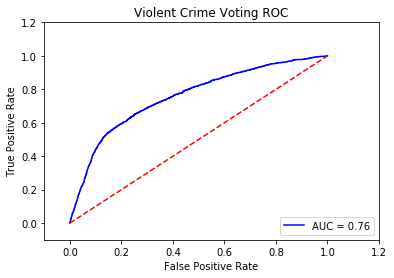

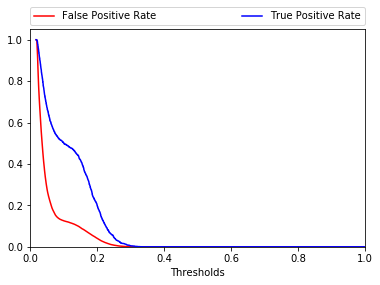


The optimal threshold for your data is: 0.053.



In [31]:
plt.title('Violent Crime Voting ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure()
plt.plot(thresholds, false_positive_rate, color='red', label='False Positive Rate')
plt.plot(thresholds, true_positive_rate, color='blue', label='True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Thresholds')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

viol_value = (0, 0)
for i in range(len(thresholds)):
    if thresholds[i] > 1:
        continue
    new_value = (true_positive_rate[i]-false_positive_rate[i], thresholds[i])
    if new_value[0] > viol_value[0] and new_value[0] != 1.0:
        viol_value = new_value
print("\nThe optimal threshold for your data is: {:.2}.\n".format(viol_value[1]))

In [32]:
viol_pred=(allgrid_v1_probs>=viol_value[1]).astype(int)
print(viol_pred)

viol_pred=pd.Series(viol_pred)
viol_pred_acc = (y_viol_1h_test==viol_pred).astype(int)

print(viol_pred_acc.mean())

[0 1 1 ..., 0 0 0]
0.74013636711867


In [33]:
vclf_r1 = VotingClassifier(estimators=[('LOG',loggrid_r1.best_estimator_),('RF',rfgrid_r1.best_estimator_)],voting='soft')

params={
  'LOG__penalty':['l1','l2'],
  'RF__max_depth': [4, 8], 'RF__min_samples_leaf':[3, 4],
  'voting':['soft']}

allgrid_r1 = RandomizedSearchCV(estimator=vclf_r1,param_distributions=params, cv=5, 
                             scoring = 'accuracy',
                             n_iter = 2)

allgrid_r1.fit(X_train,y_robb_1h_train)

allgrid_r1_pred = allgrid_r1.predict(X_test)
allgrid_r1_probs = allgrid_r1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(allgrid_r1_pred, y_robb_1h_test)
print(equality_grid.astype(int).mean())

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_robb_1h_test, allgrid_r1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.937945299931
0.756879757835


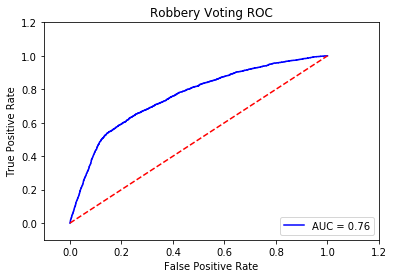

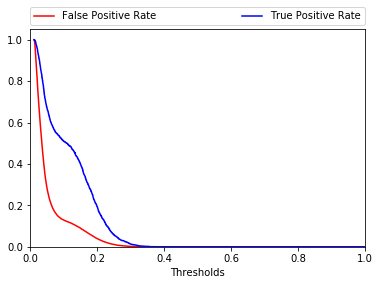


The optimal threshold for your data is: 0.057.



In [34]:
plt.title('Robbery Voting ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure()
plt.plot(thresholds, false_positive_rate, color='red', label='False Positive Rate')
plt.plot(thresholds, true_positive_rate, color='blue', label='True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Thresholds')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

robb_value = (0, 0)
for i in range(len(thresholds)):
    if thresholds[i] > 1:
        continue
    new_value = (true_positive_rate[i]-false_positive_rate[i], thresholds[i])
    if new_value[0] > robb_value[0] and new_value[0] != 1.0:
        robb_value = new_value
print("\nThe optimal threshold for your data is: {:.2}.\n".format(robb_value[1]))

In [35]:
robb_pred=(allgrid_r1_probs>=robb_value[1]).astype(int)
print(robb_pred)

robb_pred=pd.Series(robb_pred)
robb_pred_acc = (y_robb_1h_test==robb_pred).astype(int)

print(robb_pred_acc.mean())

[0 1 1 ..., 0 0 0]
0.7584463341760515


In [36]:
vclf_o1 = VotingClassifier(estimators=[('LOG',loggrid_o1.best_estimator_),('RF',rfgrid_o1.best_estimator_)],voting='soft')

params={
  'LOG__penalty':['l1','l2'],
  'RF__max_depth': [4, 8], 'RF__min_samples_leaf':[3, 4],
  'voting':['soft']}

allgrid_o1 = RandomizedSearchCV(estimator=vclf_o1,param_distributions=params, cv=5, 
                             scoring = 'accuracy',
                             n_iter = 2)

allgrid_o1.fit(X_train,y_oth_1h_train)

allgrid_o1_pred = allgrid_o1.predict(X_test)
allgrid_o1_probs = allgrid_o1.predict_proba(X_test)[:, 1]

equality_grid = np.equal(allgrid_o1_pred, y_oth_1h_test)
print(equality_grid.astype(int).mean())

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_oth_1h_test, allgrid_o1_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.937945299931
0.755234810138


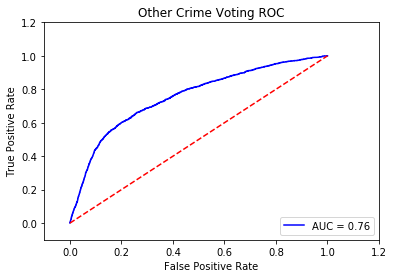

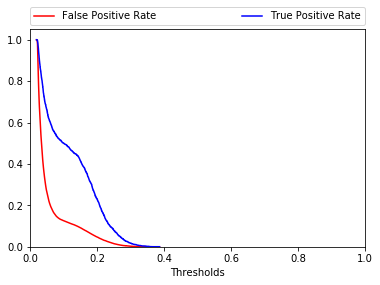


The optimal threshold for your data is: 0.05.



In [37]:
plt.title('Other Crime Voting ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', \
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure()
plt.plot(thresholds, false_positive_rate, color='red', label='False Positive Rate')
plt.plot(thresholds, true_positive_rate, color='blue', label='True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Thresholds')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

oth_value = (0, 0)
for i in range(len(thresholds)):
    if thresholds[i] > 1:
        continue
    new_value = (true_positive_rate[i]-false_positive_rate[i], thresholds[i])
    if new_value[0] > oth_value[0] and new_value[0] != 1.0:
        oth_value = new_value
print("\nThe optimal threshold for your data is: {:.2}.\n".format(oth_value[1]))

In [38]:
oth_pred=(allgrid_o1_probs>=oth_value[1]).astype(int)
print(oth_pred)

oth_pred=pd.Series(oth_pred)
oth_pred_acc = (y_oth_1h_test==oth_pred).astype(int)

print(oth_pred_acc.mean())

[0 1 1 ..., 0 0 0]
0.7352588166194234


In [39]:
print(metrics.confusion_matrix(y_any_1h_test,any_pred))

[[22429 10748]
 [ 1586  4396]]


In [40]:
print(metrics.confusion_matrix(y_prop_1h_test,prop_pred))

[[29689  7040]
 [  996  1434]]


In [41]:
print(metrics.confusion_matrix(y_viol_1h_test,viol_pred))

[[27395  9334]
 [  842  1588]]


In [42]:
print(metrics.confusion_matrix(y_robb_1h_test,robb_pred))

[[28168  8561]
 [  898  1532]]


In [43]:
print(metrics.confusion_matrix(y_oth_1h_test,oth_pred))

[[27184  9545]
 [  822  1608]]


In [44]:
importances = rf_prop1.feature_importances_
mean = np.mean([tree.feature_importances_ for tree in rf_prop1.estimators_],
             axis=0)


# Print the feature ranking
print("Feature importance:")
print("")

feature_list = []
for column in comp_data:
     feature_list.append(column)

feature_ser = pd.Series(feature_list)

feature_imp = pd.DataFrame(
{'Feature':feature_ser,
 'Importance':mean})

feature_imp.sort_values(by='Importance',inplace=True,ascending=False)
print(feature_imp)

Feature importance:

                   Feature    Importance
117       any_last_14_days  4.402203e-02
113  property_last_14_days  4.243555e-02
116     other_last_14_days  3.733773e-02
109        any_last_7_days  3.218424e-02
101        any_last_3_days  3.061305e-02
100      other_last_3_days  2.950635e-02
93         any_last_2_days  2.947263e-02
85          any_last_1_day  2.846121e-02
108      other_last_7_days  2.739644e-02
89    property_last_2_days  2.649704e-02
97    property_last_3_days  2.635628e-02
105   property_last_7_days  2.515206e-02
92       other_last_2_days  2.392710e-02
114   violent_last_14_days  2.342745e-02
84        other_last_1_day  2.078169e-02
81     property_last_1_day  2.017389e-02
80        any_last_5_hours  1.665091e-02
106    violent_last_7_days  1.554100e-02
115   robbery_last_14_days  1.486062e-02
70        any_last_3_hours  1.435074e-02
75        any_last_4_hours  1.409738e-02
79      other_last_5_hours  1.387868e-02
98     violent_last_3_days  1.319188

In [45]:
importances = rf_viol1.feature_importances_
mean = np.mean([tree.feature_importances_ for tree in rf_viol1.estimators_],
             axis=0)


# Print the feature ranking
print("Feature importance:")
print("")

feature_list = []
for column in comp_data:
     feature_list.append(column)

feature_ser = pd.Series(feature_list)

feature_imp = pd.DataFrame(
{'Feature':feature_ser,
 'Importance':mean})

feature_imp.sort_values(by='Importance',inplace=True,ascending=False)
print(feature_imp)

Feature importance:

                   Feature    Importance
117       any_last_14_days  4.478662e-02
113  property_last_14_days  4.081257e-02
116     other_last_14_days  3.964498e-02
109        any_last_7_days  3.313645e-02
93         any_last_2_days  3.224351e-02
89    property_last_2_days  3.142912e-02
101        any_last_3_days  2.939743e-02
105   property_last_7_days  2.839403e-02
108      other_last_7_days  2.741196e-02
85          any_last_1_day  2.613239e-02
100      other_last_3_days  2.496523e-02
114   violent_last_14_days  2.468720e-02
92       other_last_2_days  2.328779e-02
97    property_last_3_days  2.296368e-02
84        other_last_1_day  2.159931e-02
81     property_last_1_day  1.893002e-02
80        any_last_5_hours  1.872581e-02
106    violent_last_7_days  1.613457e-02
115   robbery_last_14_days  1.436310e-02
75        any_last_4_hours  1.395203e-02
98     violent_last_3_days  1.314232e-02
70        any_last_3_hours  1.272732e-02
79      other_last_5_hours  1.182419

In [46]:
importances = rf_robb1.feature_importances_
mean = np.mean([tree.feature_importances_ for tree in rf_robb1.estimators_],
             axis=0)


# Print the feature ranking
print("Feature importance:")
print("")

feature_list = []
for column in comp_data:
     feature_list.append(column)

feature_ser = pd.Series(feature_list)

feature_imp = pd.DataFrame(
{'Feature':feature_ser,
 'Importance':mean})

feature_imp.sort_values(by='Importance',inplace=True,ascending=False)
print(feature_imp)

Feature importance:

                   Feature    Importance
117       any_last_14_days  4.157731e-02
113  property_last_14_days  3.799068e-02
116     other_last_14_days  3.760199e-02
109        any_last_7_days  3.320141e-02
105   property_last_7_days  3.247491e-02
93         any_last_2_days  3.182513e-02
108      other_last_7_days  2.952480e-02
97    property_last_3_days  2.903715e-02
101        any_last_3_days  2.892089e-02
85          any_last_1_day  2.840025e-02
100      other_last_3_days  2.832223e-02
89    property_last_2_days  2.627535e-02
92       other_last_2_days  2.475783e-02
114   violent_last_14_days  2.287824e-02
84        other_last_1_day  2.198088e-02
81     property_last_1_day  2.029974e-02
75        any_last_4_hours  1.647286e-02
106    violent_last_7_days  1.558832e-02
80        any_last_5_hours  1.474462e-02
90     violent_last_2_days  1.347295e-02
115   robbery_last_14_days  1.344167e-02
98     violent_last_3_days  1.330534e-02
79      other_last_5_hours  1.261593

In [47]:
importances = rf_oth1.feature_importances_
mean = np.mean([tree.feature_importances_ for tree in rf_oth1.estimators_],
             axis=0)


# Print the feature ranking
print("Feature importance:")
print("")

feature_list = []
for column in comp_data:
     feature_list.append(column)

feature_ser = pd.Series(feature_list)

feature_imp = pd.DataFrame(
{'Feature':feature_ser,
 'Importance':mean})

feature_imp.sort_values(by='Importance',inplace=True,ascending=False)
print(feature_imp)

Feature importance:

                   Feature    Importance
117       any_last_14_days  4.422381e-02
113  property_last_14_days  4.076289e-02
116     other_last_14_days  3.516486e-02
109        any_last_7_days  3.462277e-02
105   property_last_7_days  2.933091e-02
108      other_last_7_days  2.830751e-02
101        any_last_3_days  2.824394e-02
93         any_last_2_days  2.793198e-02
89    property_last_2_days  2.726205e-02
100      other_last_3_days  2.671171e-02
85          any_last_1_day  2.662608e-02
92       other_last_2_days  2.613472e-02
97    property_last_3_days  2.413882e-02
114   violent_last_14_days  2.372188e-02
84        other_last_1_day  2.240394e-02
80        any_last_5_hours  1.974628e-02
81     property_last_1_day  1.947967e-02
106    violent_last_7_days  1.583094e-02
115   robbery_last_14_days  1.506958e-02
98     violent_last_3_days  1.438000e-02
75        any_last_4_hours  1.273038e-02
90     violent_last_2_days  1.224483e-02
79      other_last_5_hours  1.192157